## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import scipy.stats
import pylab
sns.set()

import warnings
warnings.filterwarnings('ignore')

## Loading and Transforming Data

In [2]:
# Importing the Data
file_name = Path('./Data/Index2018.csv')
df = pd.read_csv(file_name, parse_dates=True, index_col='date', infer_datetime_format=True, dayfirst=True) 
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [3]:
df = df.asfreq('b')
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [4]:
df = df.fillna(method='ffill')
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## S&P500 Data Only

In [5]:
# SPX data
spx_data = df['spx'].to_frame()

# Train and Test Split
train_size = int(len(spx_data)*0.8)
train_spx = spx_data.iloc[:train_size]
test_spx = spx_data.iloc[train_size:]

## White Noise

In [6]:
wn_data = np.random.normal(loc=train_spx.mean(), scale=train_spx.std(), size=len(train_spx))
train_spx['wn'] = wn_data

# Random Walk

A Special type of time series, where values tend to persist over time and the differences between periods are simply white noise

Pₜ = prices / 
Ɛₜ = residuals

Pₜ = Pₜ₋₁ + Ɛₜ

Ɛₜ = Pₜ - Pₜ₋₁

Assuming Ɛₜ ~ WhiteNoise(μ, 𝞂2)

Random Walk have following Characteristics

1. The difference between periods are simply White Noise
2. The best estimator for today's value is yesterday's value
3. The best estimator for tomorrow's value is today's value

In [7]:
rw_data = pd.read_csv(Path('./Data/RandWalk.csv'), parse_dates=True, infer_datetime_format=True, index_col='date', dayfirst=True)
rw_data = rw_data.asfreq('b')
rw_data.head()

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255


In [8]:
rw_data.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [9]:
rw_data.isna().sum()

price    0
dtype: int64

In [10]:
train_spx['rw'] = rw_data

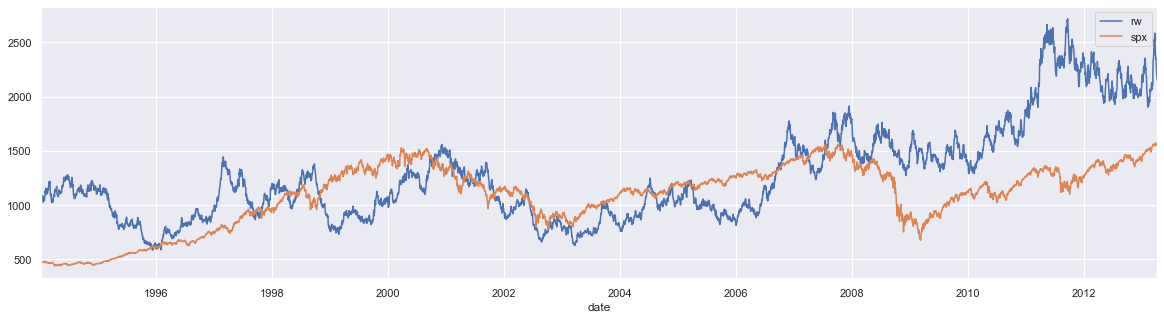

In [11]:
train_spx[['rw','spx']].plot(figsize=(20,5))

Observations

1. Both have Small variations between consecutive time periods
2. Both have Cyclical increases and decreases in short periods of time

>> If the time series resemble a Random Walk , then Prices cannot be predicted with a great accuracy

>> If the Future prices can be predcted with an accuracy, then there are Arbitrage opportunities

Arbitrage >> Buy and Sell commmodities and make a safe profit, while the price adjusts